In [1]:
import turicreate as tc
import cv2 as cv
import os
import numpy as np

# Convert Bib Images
Conver bib images for model training using Turi Create

In [65]:
img_path = '../data/RBNR/augmented/'

# Load all images in random order
raw_sf = tc.image_analysis.load_images(img_path)

Read 3259 images in 5.0009 secs	speed: 651.683 file/sec

In [66]:
raw_sf

path,image
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 720 Width: 481
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 720 Width: 480
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 720 Width: 480
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 720 Width: 480
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 573 Width: 850
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 512 Width: 342
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 720 Width: 480
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 512 Width: 342
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 720 Width: 480
/Users/ebay/Desktop/bib-detector/Data/RBNR/aug ...,Height: 573 Width: 850


In [67]:
def get_annotations_rbnr(img_path, w, h):
    f_path = img_path.split('.')[0] + '.txt'
    f = open(f_path, 'r') 
    
    annots = []
    for line in f:
        bbox = np.array(line.split(' ')[1:]).astype(float) * (w, h, w, h)
        annots.append({
            'coordinates': {'height': bbox[3], 'width': bbox[2], 'x': bbox[0], 'y': bbox[1]},
            'label': 'bib'
        })
    
    return annots

In [68]:
raw_sf['label'] = 'bib'
raw_sf['annotations'] = raw_sf.apply(lambda x: get_annotations_rbnr(x['path'], x['image'].width, x['image'].height))

In [ ]:
raw_sf['image_with_ground_truth'] = tc.object_detector.util.draw_bounding_boxes(raw_sf['image'], raw_sf['annotations'])
#raw_sf.explore()

In [71]:
# Save sframe with annotated images
raw_sf.save('rbnr.sframe')

In [73]:
# Save sframe without annotated images
# Better for uploading to Google Colab
rbnr_sf = raw_sf['image', 'label', 'annotations']
rbnr_sf.save('rbnr_tiny.sframe')

# Convert SVHN Images
Conver street view housing number images for model training using Turi Create

In [8]:
svhn_img_path = '../data/SVHN/extra/'

# Load all images in random order
svhn_sf = tc.image_analysis.load_images(svhn_img_path)

In [9]:
svhn_sf

path,image
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 141 Width: 166
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 41 Width: 52
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 32 Width: 51
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 49 Width: 51
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 44 Width: 55
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 48 Width: 68
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 100 Width: 146
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 34 Width: 89
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 36 Width: 89
/Users/ebay/Desktop/bib-detector-convert/data ...,Height: 92 Width: 121


In [10]:
def get_annotations_svhn(img_path, w, h):
    f_path = img_path.split('.')[0] + '.txt'
    f = open(f_path, 'r') 
    
    annots = []
    for line in f:
        label = line.split(' ')[0]
        bbox = np.array(line.split(' ')[1:]).astype(float) * (w, h, w, h)
        annots.append({
            'coordinates': {'height': bbox[3], 'width': bbox[2], 'x': bbox[0], 'y': bbox[1]},
            'label': label
        })
    
    return annots

In [11]:
svhn_sf['annotations'] = svhn_sf.apply(lambda x: get_annotations_svhn(x['path'], x['image'].width, x['image'].height))

/Users/ebay/opt/anaconda3/envs/rbnd-ios/lib/python3.8/site-packages/turicreate/visualization/_plot.py:461: UserWarning: Displaying only the first 100 rows.
  warnings.warn("Displaying only the first {} rows.".format(maximum_rows))


,path,image,annotations,image_with_ground_truth
0,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/1.png,,"[{'coordinates': {'height': 56.0, 'width': 38.0, 'x': 43.0, 'y': 98.0}, 'label': '4'}, {'coordinates': {'height': 56.0, 'width': 36.0, 'x': 73.0, 'y': 69.0}, 'label': '7'}, {'coordinates': {'height': 56.0, 'width': 47.00000000000001, 'x': 102.5, 'y': 51.0}, 'label': '8'}]",
1,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/10.png,,"[{'coordinates': {'height': 25.0, 'width': 18.0, 'x': 14.0, 'y': 17.5}, 'label': '4'}, {'coordinates': {'height': 25.0, 'width': 13.0, 'x': 31.499999999999996, 'y': 19.5}, 'label': '4'}, {'coordinates': {'height': 25.0, 'width': 12.0, 'x': 46.0, 'y': 19.5}, 'label': '4'}]",
2,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/100.png,,"[{'coordinates': {'height': 29.0, 'width': 16.0, 'x': 11.0, 'y': 15.5}, 'label': '5'}, {'coordinates': {'height': 29.0, 'width': 14.000000000000002, 'x': 25.0, 'y': 15.5}, 'label': '3'}, {'coordinates': {'height': 29.0, 'width': 15.0, 'x': 38.5, 'y': 15.5}, 'label': '5'}]",
3,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/1000.png,,"[{'coordinates': {'height': 31.999999999999996, 'width': 14.000000000000002, 'x': 16.0, 'y': 24.0}, 'label': '2'}, {'coordinates': {'height': 31.999999999999996, 'width': 14.000000000000002, 'x': 29.0, 'y': 23.0}, 'label': '6'}]",
4,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/10000.png,,"[{'coordinates': {'height': 21.0, 'width': 11.0, 'x': 13.5, 'y': 24.499999999999996}, 'label': '2'}, {'coordinates': {'height': 21.0, 'width': 12.0, 'x': 23.0, 'y': 21.5}, 'label': '0'}, {'coordinates': {'height': 21.0, 'width': 12.0, 'x': 35.0, 'y': 19.5}, 'label': '0'}]",
5,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/10001.png,,"[{'coordinates': {'height': 33.0, 'width': 12.0, 'x': 16.0, 'y': 27.5}, 'label': '1'}, {'coordinates': {'height': 33.0, 'width': 10.0, 'x': 31.0, 'y': 28.5}, 'label': '1'}, {'coordinates': {'height': 33.0, 'width': 13.0, 'x': 44.5, 'y': 26.5}, 'label': '9'}]",
6,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/10002.png,,"[{'coordinates': {'height': 76.0, 'width': 50.0, 'x': 45.0, 'y': 54.0}, 'label': '5'}, {'coordinates': {'height': 76.0, 'width': 35.0, 'x': 87.5, 'y': 43.0}, 'label': '1'}]",
7,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/10003.png,,"[{'coordinates': {'height': 20.0, 'width': 13.0, 'x': 39.5, 'y': 17.0}, 'label': '6'}, {'coordinates': {'height': 20.0, 'width': 15.0, 'x': 53.5, 'y': 18.0}, 'label': '5'}]",
8,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/10004.png,,"[{'coordinates': {'height': 23.0, 'width': 7.0, 'x': 42.5, 'y': 19.5}, 'label': '1'}, {'coordinates': {'height': 23.0, 'width': 10.0, 'x': 52.0, 'y': 17.5}, 'label': '2'}]",
9,/Users/ebay/Desktop/bib-detector-convert/data/SVHN/extra/10005.png,,"[{'coordinates': {'height': 34.0, 'width': 17.0, 'x': 30.5, 'y': 44.0}, 'label': '1'}, {'coordinates': {'height': 34.0, 'width': 16.0, 'x': 49.0, 'y': 47.00000000000001}, 'label': '1'}, {'coordinates': {'height': 34.0, 'width': 23.0, 'x': 69.5, 'y': 47.00000000000001}, 'label': '5'}]",

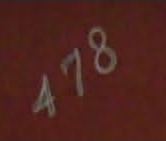
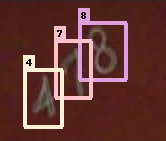
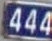
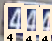
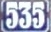
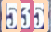
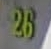
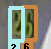
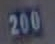
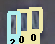
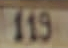
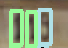
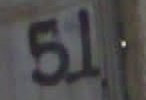
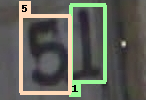
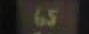
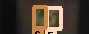
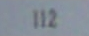
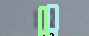
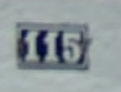
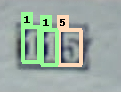
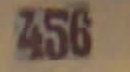
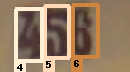
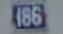
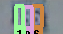
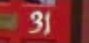
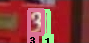
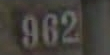
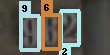
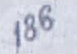
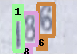
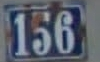
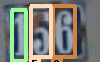
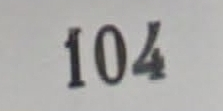
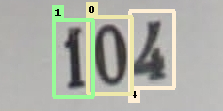
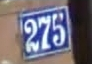
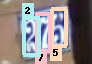
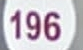
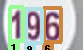
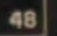
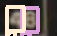
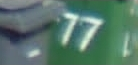
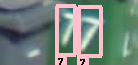
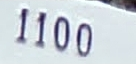
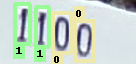
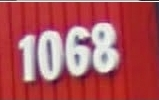
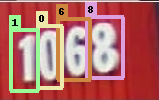
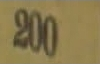
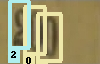
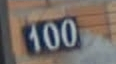
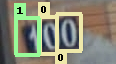
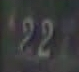
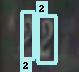
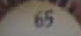
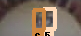
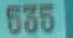
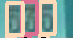
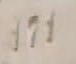
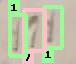
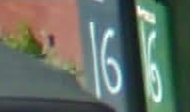
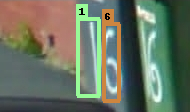
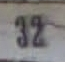
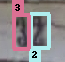
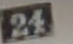
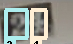
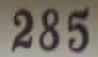
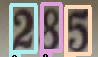
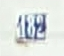
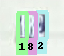
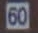
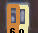
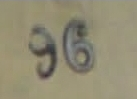
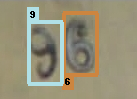
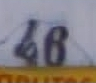
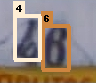
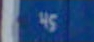
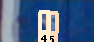
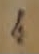
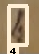
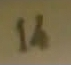
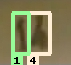
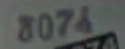
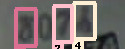
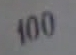
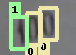
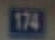
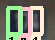
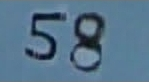
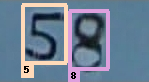
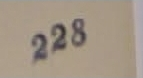
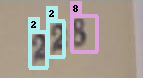
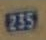
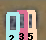
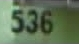
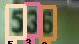
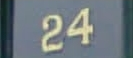
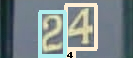
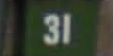
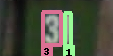
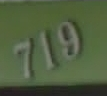
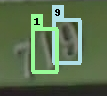
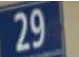
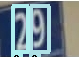
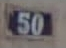
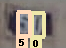
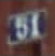
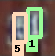
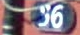
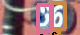
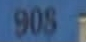
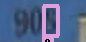
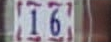
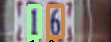
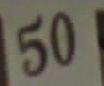
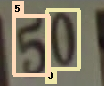
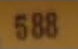
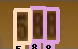
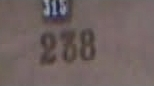
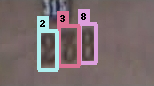
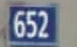
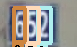
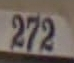
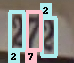
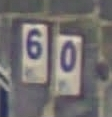
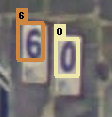
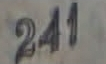
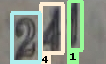
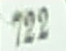
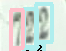
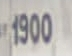
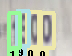
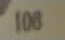
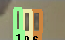
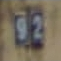
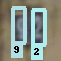
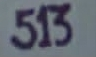
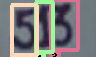
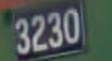
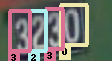
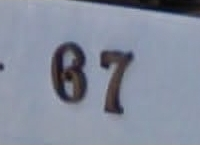
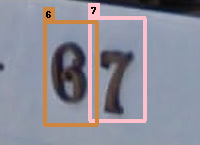
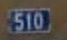
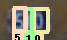
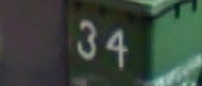
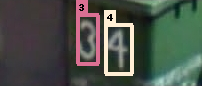
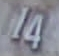
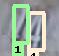
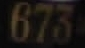
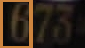
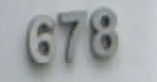
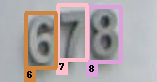
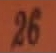
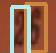
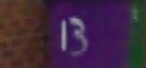
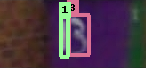
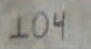
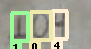
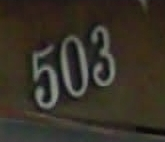
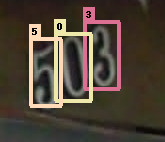
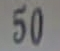
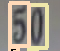
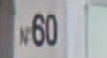
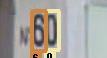
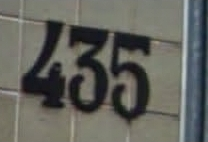
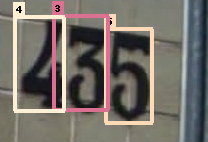
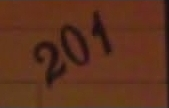
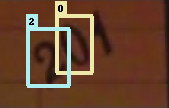
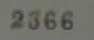
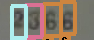
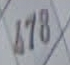
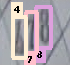
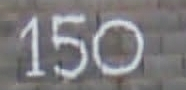
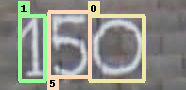
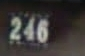
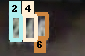
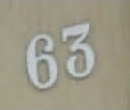
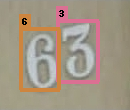
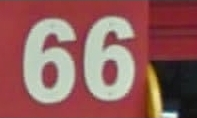
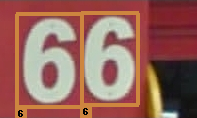
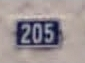
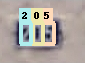
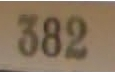
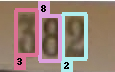
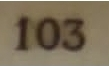
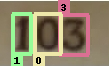
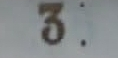
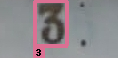
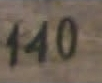
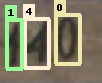
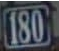
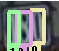

In [12]:
svhn_sf['image_with_ground_truth'] = tc.object_detector.util.draw_bounding_boxes(svhn_sf['image'], svhn_sf['annotations'])
svhn_sf.explore()

In [13]:
# Save sframe with annotated images
svhn_sf.save('../data/SVHN/svhn.sframe')

In [14]:
# Save sframe without annotated images
# Better for uploading to Google Colab
svhn_tiny_sf = svhn_sf['image', 'annotations']
svhn_tiny_sf.save('../data/SVHN/svhn_tiny.sframe')